<a href="https://colab.research.google.com/github/febbyanindya/MSIB-OrbitFutureAcademy/blob/Python/09_4_NLP_Data_Prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Materials
- Scraping | BeautifulSoup4 | website legal untuk scraping
  - Prequisite: Basic HTML dan CSS Selector
  > Tetapi untuk materi ini cukup ketahui cara kerja dan gambaran umumnya saja. Jika tertarik lebih dalam mengenai HTML dan CSS (terutama CSS Selector) untuk Web Scraping, dapat menggunakan referensi berikut untuk belajar tambahan:
    - [Playlist Dasar HTML by WPU](https://www.youtube.com/playlist?list=PLFIM0718LjIVuONHysfOK0ZtiqUWvrx4F) | Video
    - [Dasar HTML by Petani Kode](https://www.petanikode.com/tutorial/html/) | Artikel
    - [Dasar HTML by W3School](https://www.w3schools.com/html/) | Artikel dan Lab Hands On
    - [CSS Selector by WPU](https://www.youtube.com/watch?v=0KLwWyQyMQo&list=PLFIM0718LjIUBrbm6Gdh6k7ZUvPIAZm7p&index=7) | Video
    - [CSS Selector by W3School](https://www.w3schools.com/cssref/css_selectors.asp) | Artikel dan Lab Hands On

- Import data dari file txt
- Bag of Word (sebelum preprocessing)
- Preprocessing
  - Tokenization
  - Stemming
  - Lemmatization
- Bag of Word (Setelah Preprocessing)

In [1]:
# Import Library yang dibutuhkan
import requests   # Library untuk melakukan request dari website tertentu
from bs4 import BeautifulSoup # Library untuk ekstraksi konten dalam website

Untuk website yang akan kita gunakan untuk scraping adalah website warstek.com. Website ini milik Coach Wayan dan sudah mendapatkan persetujuan untuk dijadikan objek web scraping :)

In [2]:
result = requests.get("https://www.who.int/emergencies/diseases/novel-coronavirus-2019/media-resources/science-in-5/episode-22---children-covid-19?gclid=CjwKCAjw5c6LBhBdEiwAP9ejGwvN6t8eh5ht17KoFvJQZi4iQU527u8iOMamSkxGm2tMI_dEhofX5BoCIN4QAvD_BwE")

In [3]:
result.text

' <!DOCTYPE html> <html lang="en"> <head> <!-- head to scrape:on --> <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" /> <meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1"><title>\r\n\tEpisode #22 - Children &amp; COVID-19\r\n</title> <link rel="shortcut icon" href="/favicon.ico"> <link rel="manifest" href="/manifest.json"> <link href="//use.fontawesome.com/releases/v5.0.10/css/all.css" rel="stylesheet" type="text/css" /> <link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/grid.min.css?v=12.1.7126.15119\' ><link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/origin.min.css?v=12.1.7126.15119\' > <!-- head to scrape:off --> <link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/main.min.css?v=12.1.7126.15119\' > <link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/print.min.css?v=12.1.7126.15119\' media=\'print\'> \r\n            <script>\r\n               

In [4]:
# Mengubah Encoding menjadi utf-8 | Jika tidak dikonversi ke utf-8 untuk karakter khusus 
# seperti ",'/- dll akan menjadi karakter yang sulit dipahami
result.encoding = result.apparent_encoding
result.encoding

'utf-8'

In [5]:
wp = BeautifulSoup(result.text, "html.parser")

Mengambil bagian html dengan tag 'p' paling awal (paragraph)
Silakan klik link wartek yang mengarah ke artikel https://warstek.com/kabel-laut/

Nah, pada artikel tersebut kita akan menemukan tag 'p' dengan klik kanan pada artikel lalu pilih 'Inspect'

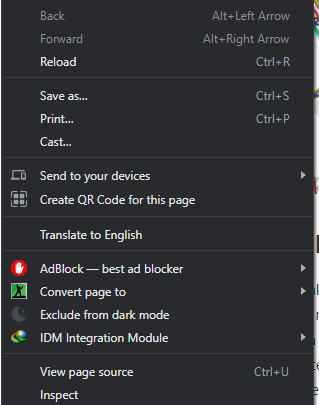

Lalu akan muncul seperti berikut,

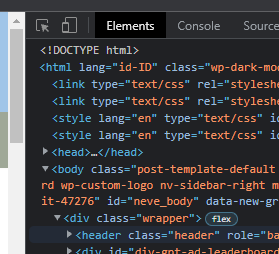

Tampilan tersebut merupakan struktur dasar dari halaman web yang berupa HTML. Struktur tersebut memiliki beberapa elemen dengan fungsinya masing - masing yang ditandai dengan adanya tag seperti `<p>`, `<img>`, `<a>`, `<table>`, `<div>` dll. 

Karena yang akan kita ambil adalah bagian konten teks dan konten teks tersebut tersimpan pada tag `<p>` (paragraph), maka kita akan menggunakan tag tersebut sebagai selector atau penanda.

Nah, pada bagian Element itu akan muncul html untuk tag 'p' tadi, kalo mau cepat nyarinya bisa dengan pencarian cepat dengan tekan CRTL + f lalu ketik p, maka akan lebih cepat nyarinya, atau bisa juga telusuri satu-satu. Nanti akan ktemu tag 'p' seperti dibawah ini:

Nahh, kira-kira demikian proses buat dapetin tag 'p'-nya.

Nah, pada bagian Element itu akan muncul html untuk tag 'p' tadi, kalo mau cepat nyarinya bisa dengan pencarian cepat dengan tekan CRTL + f lalu ketik p, maka akan lebih cepat nyarinya, atau bisa juga telusuri satu-satu. Anati akan ktemu tag 'p' seperti dibawah ini:

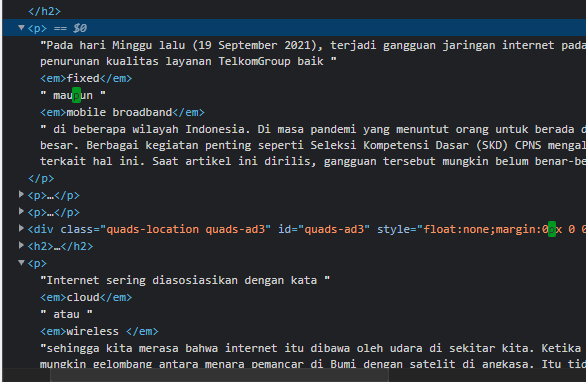

Nahh, kira-kira demikian proses buat dapetin tag 'p'-nya.

In [6]:
# Mengambil bagian html dengan tag p paling awal (paragraph)
wp.find("p")

<p><span style="caret-color:auto;text-align:inherit;text-transform:inherit;white-space:inherit;word-spacing:normal;background-color:transparent;">22 January 2021 | Science conversation</span></p>

In [7]:
# Mengambil bagian html dengan tag p paling awal, tapi hanya value-nya saja.
wp.find("p").getText()

'22 January 2021 | Science conversation'

In [8]:
wp.find('p').getText()

'22 January 2021 | Science conversation'

In [9]:
# Mengambil bagian html dengan tag p (secara keseluruhan)
wp.find_all("p")

[<p><span style="caret-color:auto;text-align:inherit;text-transform:inherit;white-space:inherit;word-spacing:normal;background-color:transparent;">22 January 2021 | Science conversation</span></p>,
 <p>Are the symptoms of COVID-19 different in children? Do the new variants impact children differently? What can parents do to keep children safe from COVID-19. WHO's Dr Maria Van Kerkhove explains in Science in 5.  </p>,
 <p>Science in 5 is WHO’s conversations in science. Watch WHO experts explain science related to COVID-19.</p>,
 <p> </p>,
 <p><strong> </strong></p>,
 <p><strong></strong></p>,
 <p><strong>Vismita Gupta-Smith<o:p></o:p></strong></p>,
 <p>We hear a lot about COVID-19 and symptoms in grownups and adults. How does COVID-19 impact children? Welcome to Science in 5. I’m Vismita Gupta-Smith and this is WHO’s conversations in science. We're talking to Dr. Maria Van Kerkhove today about COVID-19 and children. Welcome, Maria.<o:p></o:p><br/></p>,
 <p><strong>Dr. Maria Van Kerkhove

In [10]:
full_text = []
for paragraf in wp.find_all('p'):
  full_text.append(paragraf.getText())

full_text

['22 January 2021 | Science conversation',
 "Are the symptoms of COVID-19 different in children? Do the new variants impact children differently? What can parents do to keep children safe from COVID-19. WHO's Dr Maria Van Kerkhove explains in Science in 5.\xa0\xa0",
 'Science in 5 is WHO’s conversations in science. Watch WHO experts explain science related to COVID-19.',
 '\xa0',
 '\xa0',
 '',
 'Vismita Gupta-Smith',
 "We hear a lot about COVID-19 and symptoms in grownups and adults. How does COVID-19 impact children? Welcome to Science in 5. I’m Vismita Gupta-Smith and this is WHO’s conversations in science. We're talking to Dr. Maria Van Kerkhove today about COVID-19 and children. Welcome, Maria.",
 'Dr. Maria Van Kerkhove',
 'Hi, Vismita. Thanks for having me.\xa0',
 'Vismita Gupta-Smith',
 'Maria, tell us about symptoms of COVID-19 in children. Are they any different from grownups, especially in the very young ones?',
 'Dr. Maria Van Kerkhove',
 "So, this is a really important ques

> Terlihat bahwa link text masih banyak whitespace atau spasi kosong yang terdapat pada list sehingga perlu dibersihkan juga.

In [11]:
# Menghapus None dari list full_text sekaligus membersihkan elemen list dari whitespace menggunakan fungsi strip()
# List Comprehension
full_text = [paragraf.strip() for paragraf in full_text if paragraf != ""]
full_text

['22 January 2021 | Science conversation',
 "Are the symptoms of COVID-19 different in children? Do the new variants impact children differently? What can parents do to keep children safe from COVID-19. WHO's Dr Maria Van Kerkhove explains in Science in 5.",
 'Science in 5 is WHO’s conversations in science. Watch WHO experts explain science related to COVID-19.',
 '',
 '',
 'Vismita Gupta-Smith',
 "We hear a lot about COVID-19 and symptoms in grownups and adults. How does COVID-19 impact children? Welcome to Science in 5. I’m Vismita Gupta-Smith and this is WHO’s conversations in science. We're talking to Dr. Maria Van Kerkhove today about COVID-19 and children. Welcome, Maria.",
 'Dr. Maria Van Kerkhove',
 'Hi, Vismita. Thanks for having me.',
 'Vismita Gupta-Smith',
 'Maria, tell us about symptoms of COVID-19 in children. Are they any different from grownups, especially in the very young ones?',
 'Dr. Maria Van Kerkhove',
 "So, this is a really important question and we continue to l

In [12]:
full_text = ' '.join(full_text)
full_text

"22 January 2021 | Science conversation Are the symptoms of COVID-19 different in children? Do the new variants impact children differently? What can parents do to keep children safe from COVID-19. WHO's Dr Maria Van Kerkhove explains in Science in 5. Science in 5 is WHO’s conversations in science. Watch WHO experts explain science related to COVID-19.   Vismita Gupta-Smith We hear a lot about COVID-19 and symptoms in grownups and adults. How does COVID-19 impact children? Welcome to Science in 5. I’m Vismita Gupta-Smith and this is WHO’s conversations in science. We're talking to Dr. Maria Van Kerkhove today about COVID-19 and children. Welcome, Maria. Dr. Maria Van Kerkhove Hi, Vismita. Thanks for having me. Vismita Gupta-Smith Maria, tell us about symptoms of COVID-19 in children. Are they any different from grownups, especially in the very young ones? Dr. Maria Van Kerkhove So, this is a really important question and we continue to learn about SARS-CoV-2 virus, the virus that cause

---

In [13]:
# NLTK, library NLP di bahasa pemrograman python
import nltk

# Regex (re), library untuk mengenali dan memanipulasi pola text
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import requests


In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Import teks dari file eksternal
> Masukkan ke dalam folder terlebih dahulu

- [at_school.txt](https://drive.google.com/file/d/1E0_V6uPowTwKHr01VMhAVWrt0gSYgZdp/view)
- [rendang.txt](https://drive.google.com/file/d/16q4Gwk8IUBGHUqqNatKWCx-EbAEygyod/view)


In [15]:
# f = open("at_school.txt", "r")
# text = f.read()
# f.close()

text = requests.get('https://github.com/rasyidev/well-known-datasets/raw/main/at_school.txt').text
text

'At school\r\nLucas goes to school every day of the week. He has many subjects to go to each school day: English, art, science, mathematics, gym, and history. His mother packs a big backpack full of books and lunch for Lucas.\r\n\r\nHis first class is English, and he likes that teacher very much. His English teacher says that he is a good pupil, which Lucas knows means that she thinks he is a good student.\r\n\r\nHis next class is art. He draws on paper with crayons and pencils and sometimes uses a ruler. Lucas likes art. It is his favorite class.\r\n\r\nHis third class is science. This class is very hard for Lucas to figure out, but he gets to work with his classmates a lot, which he likes to do. His friend, Kyle, works with Lucas in science class, and they have fun.\r\n\r\nThen Lucas gets his break for lunch. He sits with Kyle while he eats. The principal, or the headmaster as some call him, likes to walk around and talk to students during lunch to check that they are all behaving.\r

In [16]:
# Print text
text

'At school\r\nLucas goes to school every day of the week. He has many subjects to go to each school day: English, art, science, mathematics, gym, and history. His mother packs a big backpack full of books and lunch for Lucas.\r\n\r\nHis first class is English, and he likes that teacher very much. His English teacher says that he is a good pupil, which Lucas knows means that she thinks he is a good student.\r\n\r\nHis next class is art. He draws on paper with crayons and pencils and sometimes uses a ruler. Lucas likes art. It is his favorite class.\r\n\r\nHis third class is science. This class is very hard for Lucas to figure out, but he gets to work with his classmates a lot, which he likes to do. His friend, Kyle, works with Lucas in science class, and they have fun.\r\n\r\nThen Lucas gets his break for lunch. He sits with Kyle while he eats. The principal, or the headmaster as some call him, likes to walk around and talk to students during lunch to check that they are all behaving.\r

## Membuat Text menjadi Lowercase
Mengubah kata menjadi huruf kecil (NLP -> nlp).

Kata-kata seperti Buku dan buku memiliki arti yang sama tetapi ketika tidak diubah menjadi huruf kecil, keduanya direpresentasikan sebagai dua kata yang berbeda dalam model ruang vektor.

In [17]:
text = text.lower()
text

'at school\r\nlucas goes to school every day of the week. he has many subjects to go to each school day: english, art, science, mathematics, gym, and history. his mother packs a big backpack full of books and lunch for lucas.\r\n\r\nhis first class is english, and he likes that teacher very much. his english teacher says that he is a good pupil, which lucas knows means that she thinks he is a good student.\r\n\r\nhis next class is art. he draws on paper with crayons and pencils and sometimes uses a ruler. lucas likes art. it is his favorite class.\r\n\r\nhis third class is science. this class is very hard for lucas to figure out, but he gets to work with his classmates a lot, which he likes to do. his friend, kyle, works with lucas in science class, and they have fun.\r\n\r\nthen lucas gets his break for lunch. he sits with kyle while he eats. the principal, or the headmaster as some call him, likes to walk around and talk to students during lunch to check that they are all behaving.\r

## Menghilangkan karakter khusus pada text

In [18]:
text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
text

# Untuk karakter new line (\n) akan diproses pada proses tokenisasi

'at school\r\nlucas goes to school every day of the week he has many subjects to go to each school day english art science mathematics gym and history his mother packs a big backpack full of books and lunch for lucas\r\n\r\nhis first class is english and he likes that teacher very much his english teacher says that he is a good pupil which lucas knows means that she thinks he is a good student\r\n\r\nhis next class is art he draws on paper with crayons and pencils and sometimes uses a ruler lucas likes art it is his favorite class\r\n\r\nhis third class is science this class is very hard for lucas to figure out but he gets to work with his classmates a lot which he likes to do his friend kyle works with lucas in science class and they have fun\r\n\r\nthen lucas gets his break for lunch he sits with kyle while he eats the principal or the headmaster as some call him likes to walk around and talk to students during lunch to check that they are all behaving\r\n\r\nthe next class is mathem

## Menghubah teks menjadi token (Tokenization)

In [19]:
# word_tokenize: memisahkan karakter khusus pada kata (,./@#$%&* dll) dan memisahkan kata pada text

tokens = word_tokenize(text)
print(tokens)

['at', 'school', 'lucas', 'goes', 'to', 'school', 'every', 'day', 'of', 'the', 'week', 'he', 'has', 'many', 'subjects', 'to', 'go', 'to', 'each', 'school', 'day', 'english', 'art', 'science', 'mathematics', 'gym', 'and', 'history', 'his', 'mother', 'packs', 'a', 'big', 'backpack', 'full', 'of', 'books', 'and', 'lunch', 'for', 'lucas', 'his', 'first', 'class', 'is', 'english', 'and', 'he', 'likes', 'that', 'teacher', 'very', 'much', 'his', 'english', 'teacher', 'says', 'that', 'he', 'is', 'a', 'good', 'pupil', 'which', 'lucas', 'knows', 'means', 'that', 'she', 'thinks', 'he', 'is', 'a', 'good', 'student', 'his', 'next', 'class', 'is', 'art', 'he', 'draws', 'on', 'paper', 'with', 'crayons', 'and', 'pencils', 'and', 'sometimes', 'uses', 'a', 'ruler', 'lucas', 'likes', 'art', 'it', 'is', 'his', 'favorite', 'class', 'his', 'third', 'class', 'is', 'science', 'this', 'class', 'is', 'very', 'hard', 'for', 'lucas', 'to', 'figure', 'out', 'but', 'he', 'gets', 'to', 'work', 'with', 'his', 'classm

## Membuat Bag of Words

In [20]:
mahasiswa = {
    "nama": "Qowim",
    "NIM": "1910631150029",
    "Alamat": "Jl. Palm_Raja_4"
}

In [21]:
len(mahasiswa.keys())

3

In [22]:
for kata in tokens:
  print(kata)

at
school
lucas
goes
to
school
every
day
of
the
week
he
has
many
subjects
to
go
to
each
school
day
english
art
science
mathematics
gym
and
history
his
mother
packs
a
big
backpack
full
of
books
and
lunch
for
lucas
his
first
class
is
english
and
he
likes
that
teacher
very
much
his
english
teacher
says
that
he
is
a
good
pupil
which
lucas
knows
means
that
she
thinks
he
is
a
good
student
his
next
class
is
art
he
draws
on
paper
with
crayons
and
pencils
and
sometimes
uses
a
ruler
lucas
likes
art
it
is
his
favorite
class
his
third
class
is
science
this
class
is
very
hard
for
lucas
to
figure
out
but
he
gets
to
work
with
his
classmates
a
lot
which
he
likes
to
do
his
friend
kyle
works
with
lucas
in
science
class
and
they
have
fun
then
lucas
gets
his
break
for
lunch
he
sits
with
kyle
while
he
eats
the
principal
or
the
headmaster
as
some
call
him
likes
to
walk
around
and
talk
to
students
during
lunch
to
check
that
they
are
all
behaving
the
next
class
is
mathematics
which
most
of
the
students
just
c

In [23]:
if "usia" not in mahasiswa:
  mahasiswa["usia"] = 20

In [24]:
mahasiswa

{'Alamat': 'Jl. Palm_Raja_4',
 'NIM': '1910631150029',
 'nama': 'Qowim',
 'usia': 20}

In [25]:
frekuensi_kata = {} # dictionary
for kata in tokens:
  if kata not in frekuensi_kata:
    frekuensi_kata[kata] = 1
  else:
    frekuensi_kata[kata] += 1

print(frekuensi_kata)

{'at': 1, 'school': 3, 'lucas': 8, 'goes': 1, 'to': 9, 'every': 1, 'day': 3, 'of': 4, 'the': 7, 'week': 1, 'he': 10, 'has': 3, 'many': 2, 'subjects': 1, 'go': 1, 'each': 1, 'english': 3, 'art': 3, 'science': 3, 'mathematics': 3, 'gym': 3, 'and': 9, 'history': 2, 'his': 11, 'mother': 1, 'packs': 1, 'a': 7, 'big': 1, 'backpack': 1, 'full': 1, 'books': 1, 'lunch': 3, 'for': 3, 'first': 1, 'class': 9, 'is': 13, 'likes': 4, 'that': 4, 'teacher': 3, 'very': 4, 'much': 1, 'says': 1, 'good': 3, 'pupil': 1, 'which': 3, 'knows': 1, 'means': 1, 'she': 1, 'thinks': 1, 'student': 1, 'next': 2, 'draws': 1, 'on': 1, 'paper': 1, 'with': 4, 'crayons': 1, 'pencils': 1, 'sometimes': 1, 'uses': 1, 'ruler': 1, 'it': 2, 'favorite': 1, 'third': 1, 'this': 1, 'hard': 2, 'figure': 1, 'out': 1, 'but': 2, 'gets': 2, 'work': 1, 'classmates': 1, 'lot': 1, 'do': 1, 'friend': 1, 'kyle': 3, 'works': 1, 'in': 2, 'they': 2, 'have': 1, 'fun': 1, 'then': 1, 'break': 1, 'sits': 1, 'while': 1, 'eats': 1, 'principal': 1, 'o

In [26]:
# Cetak total kata unik (tanpa duplikat)
len(frekuensi_kata.keys())

120

## Menghilangkan Stop Word


In [27]:
# Print daftar stop words dalam bahasa inggris
# Stop word ini untuk setiap project dapat disesuaikan
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
en_stop_words = stopwords.words('english')

In [29]:
"me" in en_stop_words

True

In [30]:
# Menghapus kata yang termasuk ke dalam stopwords bahasa inggris
kata_unik = list(frekuensi_kata.keys())
for kata in kata_unik:
  if kata in en_stop_words:
    del frekuensi_kata[kata]

# Update kata unik setelah penghapusan stopwords
kata_unik = list(frekuensi_kata.keys())

In [31]:
len(frekuensi_kata.keys())

81

## Stemming dan Lematization
Membandingkan hasil dari Lematization dan Stemming
- Kata Asli | Lemmatize | Lematize -> Stemming | Stemming -> Lemmatize

In [32]:
# Instansiasi objek dari Class PorterStemmer dan WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [33]:
for kata in kata_unik:
  print(kata, '|', lemmatizer.lemmatize(kata), '|', lemmatizer.lemmatize(stemmer.stem(kata)), '|', stemmer.stem(lemmatizer.lemmatize(kata)))

school | school | school | school
lucas | lucas | luca | luca
goes | go | goe | go
every | every | everi | everi
day | day | day | day
week | week | week | week
many | many | mani | mani
subjects | subject | subject | subject
go | go | go | go
english | english | english | english
art | art | art | art
science | science | scienc | scienc
mathematics | mathematics | mathemat | mathemat
gym | gym | gym | gym
history | history | histori | histori
mother | mother | mother | mother
packs | pack | pack | pack
big | big | big | big
backpack | backpack | backpack | backpack
full | full | full | full
books | book | book | book
lunch | lunch | lunch | lunch
first | first | first | first
class | class | class | class
likes | like | like | like
teacher | teacher | teacher | teacher
much | much | much | much
says | say | say | say
good | good | good | good
pupil | pupil | pupil | pupil
knows | know | know | know
means | mean | mean | mean
thinks | think | think | think
student | student | student |

In [34]:
# Menggunakan pos pada lemmatizer untuk menentukan part of speech atau kategori kata
print(lemmatizer.lemmatize('exercising'))
print(lemmatizer.lemmatize('exercising', pos = 'v'))

exercising
exercise


In [35]:
token_no_stop_words = [kata for kata in tokens if kata not in en_stop_words]
token_lemmatized = [lemmatizer.lemmatize(kata) for kata in token_no_stop_words]

frekuensi_kata_postprocessing = {}
for kata in token_lemmatized:
  if kata not in frekuensi_kata_postprocessing:
    frekuensi_kata_postprocessing[kata] = 1
  else:
    frekuensi_kata_postprocessing[kata] += 1


frekuensi_kata_postprocessing.keys()

dict_keys(['school', 'lucas', 'go', 'every', 'day', 'week', 'many', 'subject', 'english', 'art', 'science', 'mathematics', 'gym', 'history', 'mother', 'pack', 'big', 'backpack', 'full', 'book', 'lunch', 'first', 'class', 'like', 'teacher', 'much', 'say', 'good', 'pupil', 'know', 'mean', 'think', 'student', 'next', 'draw', 'paper', 'crayon', 'pencil', 'sometimes', 'us', 'ruler', 'favorite', 'third', 'hard', 'figure', 'get', 'work', 'classmate', 'lot', 'friend', 'kyle', 'fun', 'break', 'sits', 'eats', 'principal', 'headmaster', 'call', 'walk', 'around', 'talk', 'check', 'behaving', 'math', 'trouble', 'getting', 'grade', 'nice', 'helpful', 'fourth', 'exercising', 'last', 'time', 'staying', 'awake', 'lesson', 'boring', 'tired'])

In [36]:
# Membandingkan jumlah kata unik sebelum dan setelah preprocessing dengan melihat isi dari bag of words
print(len(frekuensi_kata))
print(len(frekuensi_kata_postprocessing))

81
78


---

# Preprocessing text Bahasa Indonesia

## Import teks dari file eksternal

In [37]:
# f = open("rendang.txt", "r")
# text = f.read()
# f.close()

text = requests.get('https://github.com/rasyidev/well-known-datasets/raw/main/rendang.txt').text
text

'Rendang dinobatkan menjadi salah satu makanan terenak di dunia. Makanan khas Sumatera Barat ini memang digemari banyak orang, baik di Indonesia maupun mancanegara. Rendang semula merupakan menu utama di rumah makan yang berasal dari Sumatera Barat yang dikenal dengan masakan Padang. Rendang khas Minang adalah yang paling enak dan mendunia. Masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering.\r\n\r\nDalam tradisi Minangkabau, rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat, pernikahan dan acara penting lainnya. Ketika istana negara sedang menerima kunjungan dari negara lain, rendang pun sering disajikan untuk para tamu. Bagi masyarakat Minang, rendang memiliki filosofi yang berarti kesabaran, kebijakan dan ketekunan. Hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas Indonesia di mata dunia.\r\n\r\nDalam proses pembuatannya, diolah 

## Membuat Text Menjadi Lowercase

In [38]:
text = text.lower()
text

'rendang dinobatkan menjadi salah satu makanan terenak di dunia. makanan khas sumatera barat ini memang digemari banyak orang, baik di indonesia maupun mancanegara. rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang. rendang khas minang adalah yang paling enak dan mendunia. masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering.\r\n\r\ndalam tradisi minangkabau, rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat, pernikahan dan acara penting lainnya. ketika istana negara sedang menerima kunjungan dari negara lain, rendang pun sering disajikan untuk para tamu. bagi masyarakat minang, rendang memiliki filosofi yang berarti kesabaran, kebijakan dan ketekunan. hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia.\r\n\r\ndalam proses pembuatannya, diolah 

## Menghilangkan karakter khusus pada teks

In [39]:
text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
text

'rendang dinobatkan menjadi salah satu makanan terenak di dunia makanan khas sumatera barat ini memang digemari banyak orang baik di indonesia maupun mancanegara rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang rendang khas minang adalah yang paling enak dan mendunia masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering\r\n\r\ndalam tradisi minangkabau rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat pernikahan dan acara penting lainnya ketika istana negara sedang menerima kunjungan dari negara lain rendang pun sering disajikan untuk para tamu bagi masyarakat minang rendang memiliki filosofi yang berarti kesabaran kebijakan dan ketekunan hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia\r\n\r\ndalam proses pembuatannya diolah dengan bahan dag

## Mengubah teks menjadi token (Tokenization)

In [40]:
tokens = word_tokenize(text)
print(tokens)

['rendang', 'dinobatkan', 'menjadi', 'salah', 'satu', 'makanan', 'terenak', 'di', 'dunia', 'makanan', 'khas', 'sumatera', 'barat', 'ini', 'memang', 'digemari', 'banyak', 'orang', 'baik', 'di', 'indonesia', 'maupun', 'mancanegara', 'rendang', 'semula', 'merupakan', 'menu', 'utama', 'di', 'rumah', 'makan', 'yang', 'berasal', 'dari', 'sumatera', 'barat', 'yang', 'dikenal', 'dengan', 'masakan', 'padang', 'rendang', 'khas', 'minang', 'adalah', 'yang', 'paling', 'enak', 'dan', 'mendunia', 'masakan', 'ini', 'memiliki', 'tampilan', 'yang', 'menyisakan', 'potongan', 'daging', 'berwarna', 'coklat', 'kehitaman', 'dan', 'kering', 'dalam', 'tradisi', 'minangkabau', 'rendang', 'dianggap', 'sebagai', 'makanan', 'kehormatan', 'dalam', 'acara', 'adat', 'seperti', 'perayaan', 'adat', 'pernikahan', 'dan', 'acara', 'penting', 'lainnya', 'ketika', 'istana', 'negara', 'sedang', 'menerima', 'kunjungan', 'dari', 'negara', 'lain', 'rendang', 'pun', 'sering', 'disajikan', 'untuk', 'para', 'tamu', 'bagi', 'masya

## Menghilangkan Stop Words dalam bahasa Indonesia

### Install Sastrawi

In [41]:
!pip3 install Sastrawi

     |████████████████████████████████| 209 kB 5.1 MB/s 


In [42]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stopword_remover_factory = StopWordRemoverFactory()
stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()
ina_stopword = stopword_remover_factory.create_stop_word_remover()

print(stopword_remover_factory.get_stop_words())

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [43]:
# Membuat kalimat baru dari token yang sudah dibuat sebagai parameter untuk dapat digunakan pada fungsi ina_stopword.remove()
text_from_token = ' '.join(tokens)
print(text_from_token)

text_from_token_no_stop_words = ina_stopword.remove(text_from_token)

# Mengubah kalimat yang sudah tidak terdapat stop words menjadi token lagi
# token = word_tokenize(text_from_token_no_stop_words)
# token

rendang dinobatkan menjadi salah satu makanan terenak di dunia makanan khas sumatera barat ini memang digemari banyak orang baik di indonesia maupun mancanegara rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang rendang khas minang adalah yang paling enak dan mendunia masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering dalam tradisi minangkabau rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat pernikahan dan acara penting lainnya ketika istana negara sedang menerima kunjungan dari negara lain rendang pun sering disajikan untuk para tamu bagi masyarakat minang rendang memiliki filosofi yang berarti kesabaran kebijakan dan ketekunan hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia dalam proses pembuatannya diolah dengan bahan daging sapi yang d

## Stemming untuk Bahasa Indonesia

In [44]:
stemmed_text = ina_stemmer.stem(text_from_token_no_stop_words)
stemmed_text

'rendang nobat jadi salah satu makan enak dunia makan khas sumatera barat memang gari banyak orang baik indonesia maupun mancanegara rendang mula rupa menu utama rumah makan asal sumatera barat kenal masakan padang rendang khas mang paling enak dunia masakan milik tampil sisa potong daging warna coklat hitam kering tradisi minangkabau rendang anggap makan hormat acara adat raya adat nikah acara penting lain istana negara sedang terima kunjung negara rendang sering saji para tamu masyarakat mang rendang milik filosofi arti sabar bijak tekun ini jadi bangga masyarakat mang mana pijak jadi identitas makan khas indonesia mata dunia proses buat olah bahan daging sapi masak santan rempah khas padu rasa gurih manis pedas mampu goyang lidah siapa beberapa bumbu khas guna bawang putih bawang merah jahe lengkuas cabai merah daun kunyit daun jeruk masak lama 7 jam hasil daging sapi tekstur empuk enak nikmat proses masak butuh waktu lama hingga ada cair masakan milik cita rasa khas daging empuk ti

In [45]:
token_from_stemmed_text = word_tokenize(stemmed_text)
print(token_from_stemmed_text)

['rendang', 'nobat', 'jadi', 'salah', 'satu', 'makan', 'enak', 'dunia', 'makan', 'khas', 'sumatera', 'barat', 'memang', 'gari', 'banyak', 'orang', 'baik', 'indonesia', 'maupun', 'mancanegara', 'rendang', 'mula', 'rupa', 'menu', 'utama', 'rumah', 'makan', 'asal', 'sumatera', 'barat', 'kenal', 'masakan', 'padang', 'rendang', 'khas', 'mang', 'paling', 'enak', 'dunia', 'masakan', 'milik', 'tampil', 'sisa', 'potong', 'daging', 'warna', 'coklat', 'hitam', 'kering', 'tradisi', 'minangkabau', 'rendang', 'anggap', 'makan', 'hormat', 'acara', 'adat', 'raya', 'adat', 'nikah', 'acara', 'penting', 'lain', 'istana', 'negara', 'sedang', 'terima', 'kunjung', 'negara', 'rendang', 'sering', 'saji', 'para', 'tamu', 'masyarakat', 'mang', 'rendang', 'milik', 'filosofi', 'arti', 'sabar', 'bijak', 'tekun', 'ini', 'jadi', 'bangga', 'masyarakat', 'mang', 'mana', 'pijak', 'jadi', 'identitas', 'makan', 'khas', 'indonesia', 'mata', 'dunia', 'proses', 'buat', 'olah', 'bahan', 'daging', 'sapi', 'masak', 'santan', '

## Membuat Bag of Words dari teks Bahasa Indonesia

In [46]:
frekuensi_kata_ina = {}
for kata in token_from_stemmed_text:
  if kata not in frekuensi_kata_ina:
    frekuensi_kata_ina[kata] = 1
  else:
    frekuensi_kata_ina[kata] += 1

print(frekuensi_kata_ina)

{'rendang': 8, 'nobat': 1, 'jadi': 4, 'salah': 1, 'satu': 1, 'makan': 6, 'enak': 6, 'dunia': 4, 'khas': 7, 'sumatera': 2, 'barat': 2, 'memang': 1, 'gari': 1, 'banyak': 2, 'orang': 2, 'baik': 1, 'indonesia': 3, 'maupun': 1, 'mancanegara': 2, 'mula': 1, 'rupa': 1, 'menu': 1, 'utama': 1, 'rumah': 1, 'asal': 1, 'kenal': 2, 'masakan': 3, 'padang': 1, 'mang': 3, 'paling': 1, 'milik': 3, 'tampil': 1, 'sisa': 1, 'potong': 1, 'daging': 4, 'warna': 1, 'coklat': 1, 'hitam': 1, 'kering': 1, 'tradisi': 1, 'minangkabau': 1, 'anggap': 1, 'hormat': 1, 'acara': 2, 'adat': 2, 'raya': 1, 'nikah': 1, 'penting': 1, 'lain': 1, 'istana': 1, 'negara': 2, 'sedang': 1, 'terima': 1, 'kunjung': 1, 'sering': 1, 'saji': 1, 'para': 1, 'tamu': 1, 'masyarakat': 2, 'filosofi': 1, 'arti': 1, 'sabar': 1, 'bijak': 1, 'tekun': 1, 'ini': 2, 'bangga': 1, 'mana': 1, 'pijak': 1, 'identitas': 1, 'mata': 1, 'proses': 2, 'buat': 2, 'olah': 1, 'bahan': 1, 'sapi': 2, 'masak': 4, 'santan': 1, 'rempah': 2, 'padu': 1, 'rasa': 4, 'guri

## Activity
- Scraping (Bahasa Indonesia / English) | opsi: salah satu aja, kalau mau keduanya dibagi 2 kelompok.
---
1. Cari teks bahasa inggris
2. Preprocessing menggunakan library yang diperlukan
3. Lakukan point 1-2 juga untuk teks bahasa indonesia
4. Apakah terdapat perbedaan preprocessing untuk bahasa Inggris dan bahasa Indonesia? Coba sebutkan!

In [47]:
result.text

' <!DOCTYPE html> <html lang="en"> <head> <!-- head to scrape:on --> <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" /> <meta charset="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1"><title>\r\n\tEpisode #22 - Children &amp; COVID-19\r\n</title> <link rel="shortcut icon" href="/favicon.ico"> <link rel="manifest" href="/manifest.json"> <link href="//use.fontawesome.com/releases/v5.0.10/css/all.css" rel="stylesheet" type="text/css" /> <link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/grid.min.css?v=12.1.7126.15119\' ><link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/origin.min.css?v=12.1.7126.15119\' > <!-- head to scrape:off --> <link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/main.min.css?v=12.1.7126.15119\' > <link rel=\'stylesheet\' href=\'/ResourcePackages/WHO/assets/dist/styles/print.min.css?v=12.1.7126.15119\' media=\'print\'> \r\n            <script>\r\n               